# Solution for the Dalitz Plot 2
The Dalitz plot is for the decay $D^0\to K^- \pi^+\pi^0$ by CLEO [PhysRevD.63.092001 (2001)]
![Scattering of neutrons on a nuclear](pict/D0K-pi+pi-.png)

One sees three main decay chains:
 * $D^0 \to K^\star(\to K^- \pi^+)\, \pi^0$
 * $D^0 \to K^-\,\rho(\to \pi^+ \pi^0)$
 * $D^0 \to K^\star(\to K^- \pi^0)\, \pi^+$

The matrix element in the isobar model reads
$$
\mathfrak{M} = c_3\frac{|\vec{p}_1^*||\vec{p}_3|\cos{\theta_{23}}}{m_{K^*}^2 - s_3 - i m_{K^\star}\Gamma_{K^\star}} + 
c_1\frac{|\vec{p}_2^*||\vec{p}_1|\cos{\theta_{23}}}{m_{\phi}^2 - s_1 - i m_{\phi}\Gamma_{\phi}}+
c_2\frac{|\vec{p}_3^*||\vec{p}_2|\cos{\theta_{31}}}{m_{K^\star}^2 - s_2 - i m_{K^*}\Gamma_{K^*}}
$$

### Plotting functions

In [1]:
using PyPlot
using PyCall
@pyimport numpy.ma as ma

# simple flat plot
function Plot(f, x)
    fx=[f(xi) for xi in x]
    plot(x, fx)
end

# plot of function of 2 variables, 3D plot
function Plot(f, x, y)
    fx=[[xi, yi, f(xi,yi)] for xi in x for yi in y]
    surf([fxi[1] for fxi in fx], [fxi[2] for fxi in fx], [fxi[3] for fxi in fx])
end

# plot of function of 2 variables, color-codded
function DensityPlot(f, x, y)
    xy = [[xi, yi] for xi in x, yi in y]
    zv = [f((xy[i,j][1]+xy[i+1,j+1][1])/2.,
            (xy[i,j][2]+xy[i+1,j+1][2])/2.) for i in 1:(size(xy,1)-1), j in 1:(size(xy,2)-1)]
    zvmask = pycall(ma.array, Any, zv, mask=isnan.(zv))
    xv = [xy[i,j][1] for i in 1:size(xy,1), j in 1:size(xy,2)]
    yv = [xy[i,j][2] for i in 1:size(xy,1), j in 1:size(xy,2)]
    pcolor(xv, yv, zvmask)
end

DensityPlot (generic function with 1 method)

### Kinematics functions

In [2]:
# K\"allen function
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*y*z-2*z*x

# Break-up momentum
psq(x,y,z)=λ(x,y,z)/(4*x);

# scattering angle in the s-channel
cosθsq(s,t,Msq,m1sq,m2sq,m3sq)=(2s*(t-m2sq-m3sq)-(s+m2sq-m1sq)*(Msq-s-m3sq))^2/(λ(s,m1sq,m2sq)*λ(Msq,s,m3sq))

# inverse to previous one
function t(s,cosθ,Msq,m1sq,m2sq,m3sq)
    e2 = (s+m2sq-m1sq)/(2*sqrt(s))
    e3 = (Msq-s-m3sq)/(2*sqrt(s))
    p2 = sqrt(λ(s,m1sq,m2sq)/(4*s))
    p3 = sqrt(λ(Msq,s,m3sq)/(4*s))
    m2sq+m3sq+2*e2*e3-2*p2*p3*cosθ
end

# border function returns 0 or 1 whether the dacay is forbidden or allowed
function border(s,t,Msq,m1sq,m2sq,m3sq)
    val = 0.0
    √s =sqrt(s); √t =sqrt(t)
    m1 = sqrt(m1sq); m2 = sqrt(m2sq); m3 = sqrt(m3sq)
    Mtot = sqrt(Msq)
    if (√s > m1+m2) && (√s < Mtot-m3) && (√t > m2+m3) && (√t < Mtot-m1) && (cosθsq(s,t,Msq,m1sq,m2sq,m3sq) < 1.)
        val = 1
    end
    return val
end

#
function h1(p)
    R=5
    RPsq = R^2*p^2
    sqrt(RPsq/(1+RPsq))
end

h1 (generic function with 1 method)

## Plot of the matrix element square

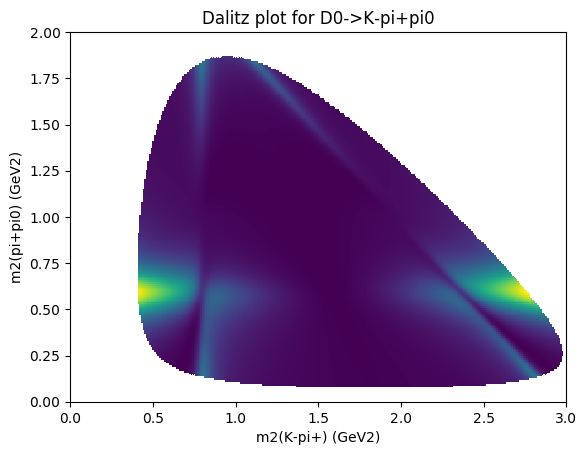

3-element Array{Any,1}:
 PyObject <matplotlib.text.Text object at 0x7fa13a669910>
 PyObject <matplotlib.text.Text object at 0x7fa13a658fd0>
 PyObject <matplotlib.text.Text object at 0x7fa13a627b90>

In [4]:
# Function for the square of the matrix element
mπ=0.139; mK=0.498;
mKs=0.892; ΓKs = 0.05;
mρ = 0.77; Γρ=0.15
mD = 1.864

m1sq = mK^2; m2sq = mπ^2; m3sq = mπ^2;
Msq = mD^2

# This is a function fo fill
function Matr(s,t)
    mm = 0.
    # first resonance K*(K-pi+)
    cosθ12=sqrt(cosθsq(s,t,Msq,m1sq,m2sq,m3sq))
    p1star = sqrt(psq(s,m1sq,m2sq))
    p3 = sqrt(psq(Msq,s,m3sq))
    mm -= cosθ12*h1(p1star)*h1(p3)/(mKs^2-s-1im*ΓKs*mKs)
    # second resonance rho (pi+pi0)
    u = Msq+m1sq+m2sq+m3sq-s-t
    cosθ23=sqrt(cosθsq(t,u,Msq,m2sq,m3sq,m1sq))
    p2star = sqrt(psq(t,m2sq,m3sq))
    p1 = sqrt(psq(Msq,t,m1sq))
    mm += 4*cosθ23*h1(p2star)*h1(p1)/(mρ^2-t-1im*Γρ*mρ)
    # second resonance K*(pi0 K-)
    cosθ31=sqrt(cosθsq(u,s,Msq,m3sq,m1sq,m2sq))
    p3star = sqrt(psq(u,m3sq,m1sq))
    p2 = sqrt(psq(Msq,t,m2sq))
    mm -= cosθ31*h1(p3star)*h1(p2)/(mKs^2-u-1im*ΓKs*mKs)
    return mm
end

# MatrSq just add missing values outside of the Dalitz plot
function MatrSq(s,t)
    if (border(s,t,Msq,m1sq,m2sq,m3sq) == 0)
        return NaN
    end
    abs(Matr(s,t))^2
end

# Plot
pp = DensityPlot(MatrSq, 0:0.01:3., 0:0.01:2)
pp[:axes][:set](title="Dalitz plot for D0->K-pi+pi0",
xlabel = "m2(K-pi+) (GeV2)",
ylabel = "m2(pi+pi0) (GeV2)")